In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.interpolate import interp1d

In [ ]:
video_path = '/content/drive/MyDrive/Projet P6/Code/yolov7-deepsort-tracking/IO_data/output/experience_camera_1/0-62-20240328122525.avi'
file_name = video_path.rsplit("/", 1)[-1].rsplit("\\", 1)[-1] # '/content/0-02-202403181514.mkv' -> '0-02-202403181514.mkv'
print (file_name)
split = re.split(r'[_.]', file_name)
nb = split[-2]
print(nb)
data_json_path = '/content/drive/MyDrive/Projet P6/Code/yolov7-deepsort-tracking/json/cam1_data_object_tracking_deltatime_0.07_'+nb+'.json'
print (data_json_path)
frames_json_path = '/content/drive/MyDrive/Projet P6/Code/yolov7-deepsort-tracking/json/cam1_data_framepassage_deltatime_0.07_'+nb+'.json'
print (frames_json_path)

with open(data_json_path) as f:
    data_json = json.load(f)

with open(frames_json_path) as f :
  frames_json = json.load(f)

0-62-20240328122525.avi
0-62-20240328122525
/content/drive/MyDrive/Projet P6/Code/yolov7-deepsort-tracking/json/cam1_data_object_tracking_deltatime_0.07_0-62-20240328122525.json
/content/drive/MyDrive/Projet P6/Code/yolov7-deepsort-tracking/json/cam1_data_framepassage_deltatime_0.07_0-62-20240328122525.json


In [ ]:
# Open the JSON file
# 'data' now contains the contents of the JSON file as a Python dictionary
def preprocess (data_json) :
  for object in data_json :
    frames = list(data_json[object].keys())
    for i,frame_num in enumerate( data_json[object] ):
      if i != 0 :
        frame = data_json[object][frame_num]
        ante_num = frames[frames.index(frame_num)-1]
        ante = data_json[object][ante_num]
        frame.append(round((frame[0]-ante[0])/(int(frame_num)-int(ante_num)),3))
        frame.append(round((frame[1]-ante[1])/(int(frame_num)-int(ante_num)),3))
        frame.append(round(np.sqrt(frame[5]**2+frame[6]**2),3))
        if i == 1 :
          frame.append(0)
        else :
          frame.append(round((frame[7]-ante[7])/(int(frame_num)-int(ante_num)),3))
    if len(frames) > 1 :
      data_json[object][frames[0]].append(data_json[object][frames[1]][5])
      data_json[object][frames[0]].append(data_json[object][frames[1]][6])
      data_json[object][frames[0]].append(data_json[object][frames[1]][7])
      data_json[object][frames[0]].append(data_json[object][frames[1]][8])
    else :
      data_json[object][frames[0]].append(0)
      data_json[object][frames[0]].append(0)
      data_json[object][frames[0]].append(0)
      data_json[object][frames[0]].append(0)
  return data_json

data_json = preprocess(data_json)

{'1': {'3': [547.0, 153.0, 152, 134, 'car', 0.0, 0.0, 0.0, 0],
  '4': [547.0, 153.0, 152, 134, 'car', 0.0, 0.0, 0.0, 0],
  '5': [547.5, 152.5, 153, 135, 'car', 0.5, -0.5, 0.707, 0.707],
  '6': [547.5, 152.5, 153, 135, 'car', 0.0, 0.0, 0.0, -0.707],
  '7': [547.5, 152.5, 153, 135, 'car', 0.0, 0.0, 0.0, 0.0],
  '8': [547.5, 152.5, 153, 135, 'car', 0.0, 0.0, 0.0, 0.0],
  '9': [547.5, 152.5, 153, 135, 'car', 0.0, 0.0, 0.0, 0.0],
  '10': [547.5, 152.0, 153, 136, 'car', 0.0, -0.5, 0.5, 0.5],
  '11': [547.5, 152.0, 153, 136, 'car', 0.0, 0.0, 0.0, -0.5],
  '12': [547.5, 152.0, 153, 136, 'car', 0.0, 0.0, 0.0, 0.0],
  '13': [547.5, 152.0, 153, 136, 'car', 0.0, 0.0, 0.0, 0.0],
  '14': [547.5, 152.0, 153, 136, 'car', 0.0, 0.0, 0.0, 0.0],
  '15': [547.5, 152.0, 153, 136, 'car', 0.0, 0.0, 0.0, 0.0],
  '16': [547.5, 152.0, 153, 136, 'car', 0.0, 0.0, 0.0, 0.0],
  '17': [547.5, 152.0, 153, 136, 'car', 0.0, 0.0, 0.0, 0.0],
  '18': [547.0, 152.0, 152, 136, 'car', -0.5, 0.0, 0.5, 0.5],
  '19': [547.5, 152

In [ ]:

def linear_speed_estimate (time, speed) :
  # Convert time from str to int
  time = np.array([int(t) for t in time])

  # Perform linear interpolation for missing values in speed
  f_speed = interp1d(time, speed, kind='linear')

  # Define the range of time for interpolation
  min_time = time.min()
  max_time = time.max()

  # Generate new time values in the range [min_time, max_time]
  new_time = np.arange(min_time, max_time + 1)

  # Interpolate missing values in speed using the new time values
  new_speed = f_speed(new_time)

  return new_time, new_speed

def constant_acc_estimate (time, acc) :
  time = np.array([int(t) for t in time])
  f_acc = interp1d(time, acc, kind='previous')
  min_time = time.min()
  max_time = time.max()
  new_time = np.arange(min_time, max_time + 1)
  new_acc = f_acc(new_time)
  return new_time, new_acc

In [ ]:

# Example array
array = np.array([1, 2, 3, 0, 5, 6, 0, 8, 9, 10])

# Function to get intervals of size 30 containing index n
def get_intervals(array, n, interval_size):
    n = int(n)
    intervals = []

    # Iterate through the array to find intervals centered around index n
    for i in range(interval_size):
        start_index = n - interval_size + 1 +i
        end_index =  n + 1 + i
        if start_index >= 0 and end_index < len(array) :
          intervals.append (array[start_index:end_index] )
    return np.array(intervals)

[[2 3 0 5]
 [3 0 5 6]
 [0 5 6 0]
 [5 6 0 8]]


In [ ]:
def nb_actual_measures (frames,interval) :
  return len(np.intersect1d(frames.astype(int),interval))

def max_actual_measures (frames,interval_size,time,frame) :
  intervals = get_intervals(time,frame,interval_size)
  if intervals.size == 0 :
    return 0
  return max ([nb_actual_measures(frames,interval) for interval in intervals])

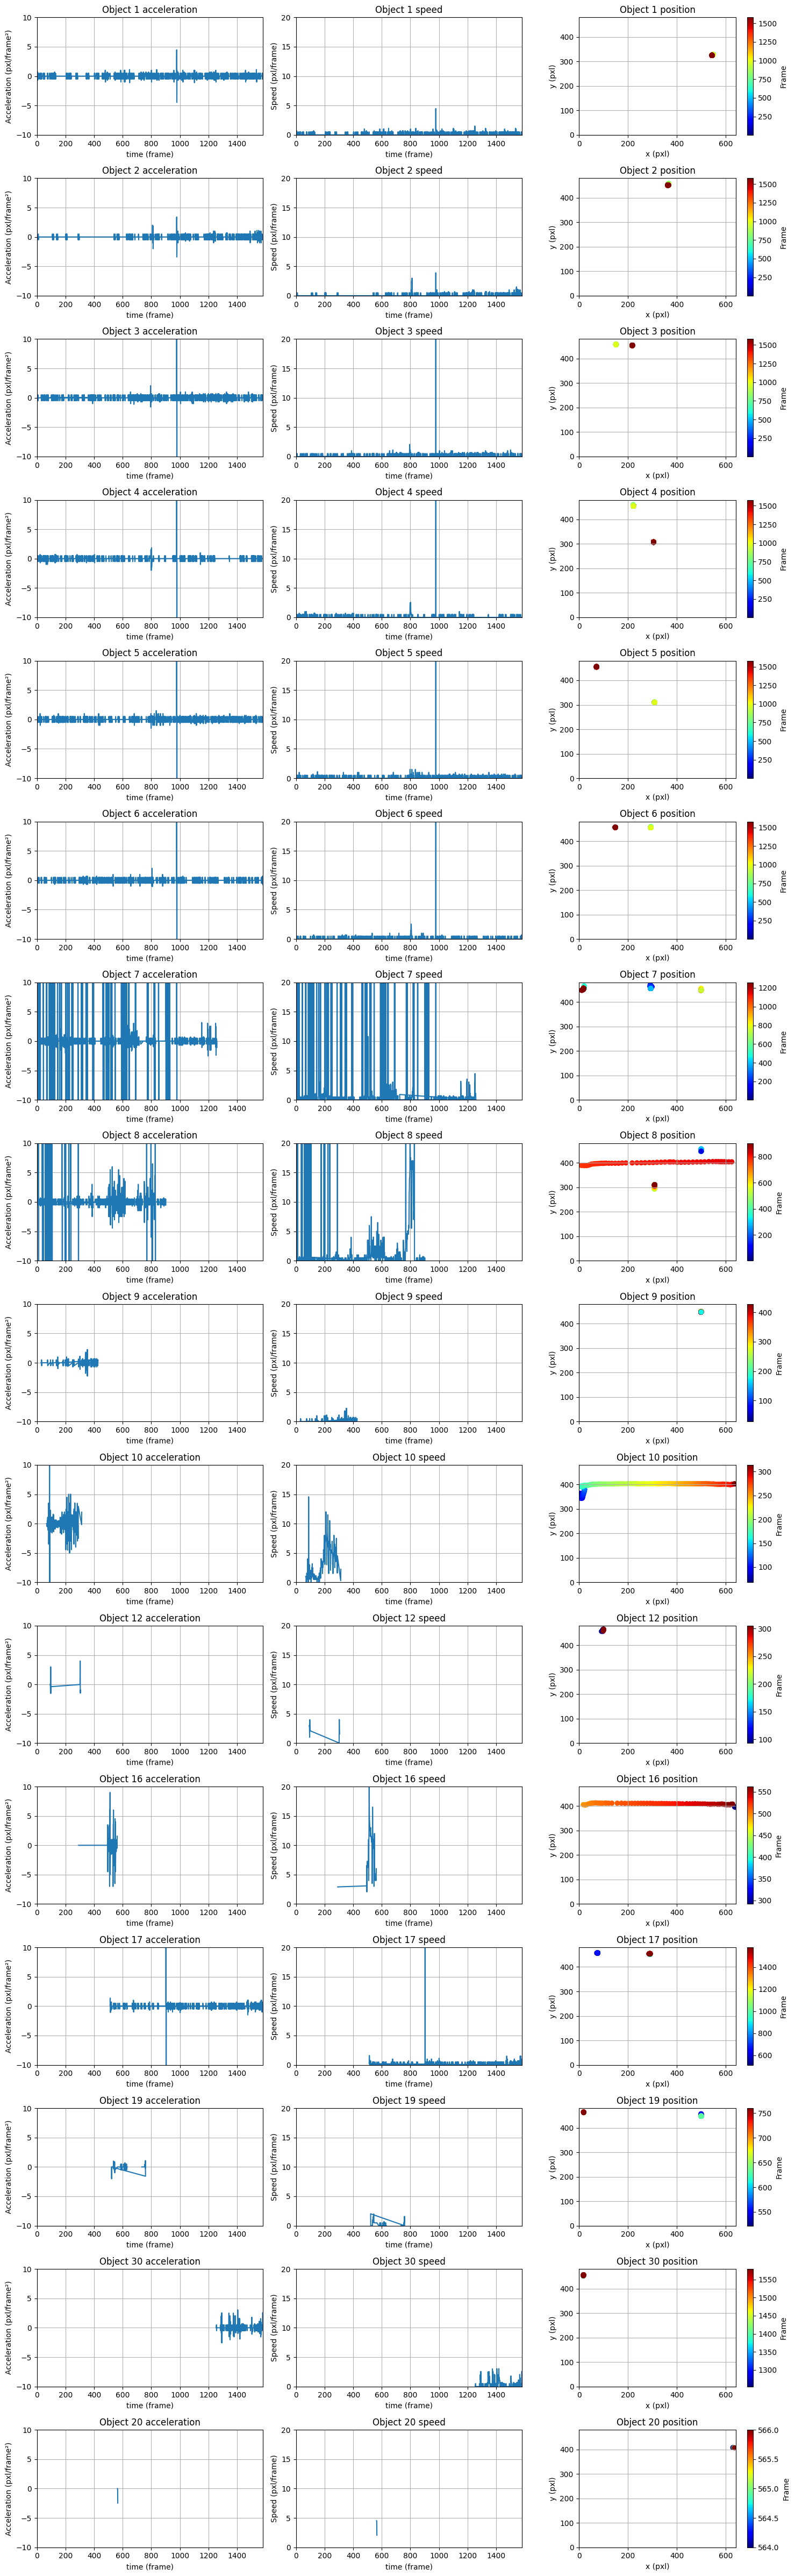

In [ ]:
plt.figure(figsize=(15, len(data_json)*3))
for j,object in enumerate(data_json) :
  frames = list(data_json[object].keys())
  x = np.array([data_json[object][frame][0] for frame in frames])
  y = np.array([data_json[object][frame][1] for frame in frames])
  v = np.array([data_json[object][frame][7] for frame in frames])
  a = np.array([data_json[object][frame][8] for frame in frames])
  t = [int(x) for x in frames]
  cmap = plt.cm.jet

  frame_max = int(max(np.array(list(frames_json.keys())).astype(int)))

  plt.subplot (len(data_json),3,3*j+1)
  plt.plot(t,a)
  plt.grid()
  plt.title ('Object '+ object +' acceleration')
  plt.ylabel('Acceleration (pxl/frame²)')
  plt.xlabel('time (frame)')
  plt.xlim(0, frame_max)
  plt.ylim(-10, 10)

  plt.subplot (len(data_json),3,3*j+2)
  plt.plot(t,v)
  plt.grid()
  plt.title ('Object '+ object +' speed')
  plt.ylabel('Speed (pxl/frame)')
  plt.xlabel('time (frame)')
  plt.xlim(0, frame_max)
  plt.ylim(0, 20)

  plt.subplot (len(data_json),3,3*j+3)
  plt.scatter(x, 480 - y, c=t, cmap=cmap)
  plt.colorbar(label='Frame')
  plt.grid()
  plt.title ('Object '+ object +' position')
  plt.ylabel('y (pxl)')
  plt.xlabel('x (pxl)')
  plt.xlim(0, 640)
  plt.ylim(0, 480)
  plt.gca().set_aspect('equal')


plt.tight_layout()
plt.show()

In [ ]:

def detect_moving_frame (frames_json, data_json, frame, speed_threshold = 3, mean_speed_threshold = 5, frame_ratio = 0.5, time_interval = 15, acc_threshold = 3) :
  moving_objects = []
  motionless_objects = []
  for object in frames_json[frame] :
    object_stat = data_json[str(object)]
    object_frame = object_stat[frame]
    time = np.array(list(object_stat.keys()))
    speed = np.array([object_stat[f][7] for f in time])
    acceleration = np.array([object_stat[f][8] for f in time])
    t,v = linear_speed_estimate (time,speed)
    _,a = constant_acc_estimate (time,acceleration)
    speed_intervals = get_intervals(v, int(frame), time_interval)
    a = speed_intervals
    acc_intervals = get_intervals(a, int(frame), time_interval)
    if  (max_actual_measures (time,time_interval,t,frame) > frame_ratio*time_interval) and (len(v) > time_interval) and np.any(np.all(speed_intervals != 0, axis = -1))  and np.any(np.median(speed_intervals,axis = 1) > mean_speed_threshold) and np.any(np.all(acc_intervals < acc_threshold)) :
      moving_objects.append(object)
    else :
      motionless_objects.append(object)
  return moving_objects, motionless_objects

In [ ]:
detect_moving_frame(frames_json, data_json,'171')

([], [1, 2, 3, 4, 5, 6, 7])

In [ ]:
def frame_by_frame (frames_json, data_json) :
  moving_by_frames = {}
  nb_moving_by_frame = {}
  for frame in frames_json :
    moving_by_frames[frame] = detect_moving_frame (frames_json, data_json, frame)
    nb_moving_by_frame[frame] = len(moving_by_frames[frame][0])
  return moving_by_frames, nb_moving_by_frame


In [ ]:
fbf, nb = frame_by_frame(frames_json, data_json)
fbf

{'1': ([], []),
 '2': ([], []),
 '3': ([], [1, 2, 3, 4, 5, 6]),
 '4': ([], [1, 2, 3, 4, 5, 6]),
 '5': ([], [1, 2, 3, 4, 5, 6]),
 '6': ([], [1, 2, 3, 4, 5, 6]),
 '7': ([], [1, 2, 3, 4, 5, 6]),
 '8': ([], [1, 2, 3, 4, 5, 6]),
 '9': ([], [1, 2, 3, 4, 5, 6]),
 '10': ([], [1, 2, 3, 4, 5, 6, 7]),
 '11': ([], [1, 2, 3, 4, 5, 6, 7]),
 '12': ([], [1, 2, 3, 4, 5, 6, 7]),
 '13': ([], [1, 2, 3, 4, 5, 6, 7]),
 '14': ([], [1, 2, 3, 4, 5, 6, 7]),
 '15': ([], [1, 2, 3, 4, 5, 6, 7]),
 '16': ([], [1, 2, 3, 4, 5, 6]),
 '17': ([], [1, 2, 3, 4, 5, 6]),
 '18': ([], [1, 2, 3, 4, 5, 6]),
 '19': ([], [1, 2, 3, 4, 5, 6]),
 '20': ([], [1, 2, 3, 4, 5, 6]),
 '21': ([], [1, 2, 3, 4, 5, 6]),
 '22': ([], [1, 2, 3, 4, 5, 6]),
 '23': ([], [1, 2, 3, 4, 5, 6, 7]),
 '24': ([], [1, 2, 3, 4, 5, 6, 7]),
 '25': ([], [1, 2, 3, 4, 5, 6, 7]),
 '26': ([], [1, 2, 3, 4, 5, 6, 7]),
 '27': ([], [1, 2, 3, 4, 5, 6, 7]),
 '28': ([], [1, 2, 3, 4, 5, 6, 7]),
 '29': ([], [1, 2, 3, 4, 5, 6, 7]),
 '30': ([], [1, 2, 3, 4, 5, 6, 7]),
 '31': ([

In [ ]:
nb

{'1': 0,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 0,
 '10': 0,
 '11': 0,
 '12': 0,
 '13': 0,
 '14': 0,
 '15': 0,
 '16': 0,
 '17': 0,
 '18': 0,
 '19': 0,
 '20': 0,
 '21': 0,
 '22': 0,
 '23': 0,
 '24': 0,
 '25': 0,
 '26': 0,
 '27': 0,
 '28': 0,
 '29': 0,
 '30': 0,
 '31': 0,
 '32': 0,
 '33': 0,
 '34': 0,
 '35': 0,
 '36': 0,
 '37': 0,
 '38': 0,
 '39': 0,
 '40': 0,
 '41': 0,
 '42': 0,
 '43': 0,
 '44': 0,
 '45': 0,
 '46': 0,
 '47': 0,
 '48': 0,
 '49': 0,
 '50': 0,
 '51': 0,
 '52': 0,
 '53': 0,
 '54': 0,
 '55': 0,
 '56': 0,
 '57': 0,
 '58': 0,
 '59': 0,
 '60': 0,
 '61': 0,
 '62': 0,
 '63': 0,
 '64': 0,
 '65': 0,
 '66': 0,
 '67': 0,
 '68': 0,
 '69': 0,
 '70': 0,
 '71': 0,
 '72': 0,
 '73': 0,
 '74': 0,
 '75': 0,
 '76': 0,
 '77': 0,
 '78': 0,
 '79': 0,
 '80': 0,
 '81': 0,
 '82': 0,
 '83': 0,
 '84': 0,
 '85': 0,
 '86': 0,
 '87': 0,
 '88': 0,
 '89': 0,
 '90': 0,
 '91': 0,
 '92': 0,
 '93': 0,
 '94': 0,
 '95': 0,
 '96': 0,
 '97': 0,
 '98': 0,
 '99': 0,
 '100': 0,
 '101': 

In [ ]:
import plotly.graph_objects as go

def graph(fbf):
    time = list(fbf.keys())
    moving = [len(fbf[frame][0]) for frame in fbf]
    motionless = [len(fbf[frame][1]) for frame in fbf]

    # Create traces
    moving_trace = go.Scatter(x=time, y=moving, mode='lines', name='moving objects')
    motionless_trace = go.Scatter(x=time, y=motionless, mode='lines', name='motionless objects')

    # Create figure
    fig = go.Figure()

    # Add traces to figure
    fig.add_trace(moving_trace)
    fig.add_trace(motionless_trace)

    # Update layout
    fig.update_layout(title='Moving vs Motionless Objects over Time',
                      xaxis_title='Time',
                      yaxis_title='Number of Objects')

    # Show figure
    fig.show()


graph (fbf)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Open the video file
video_capture = cv2.VideoCapture(video_path)  # Replace 'your_video.avi' with the path to your AVI file

if not video_capture.isOpened():
    print("Error: Could not open the video file.")
    exit()

# Get the total number of frames in the video
total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

# Function to display the frame at the specified frame number
def display_frame(frame_number):
    # Set the frame position
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    # Read the frame
    ret, frame = video_capture.read()
    if not ret:
        print("Error: Could not read the frame.")
        return

    # Display the frame
    cv2_imshow(frame)
    cv2.waitKey(0)  # Wait indefinitely until a key is pressed
    cv2.destroyAllWindows()

# Choose the frame number you want to display
frame_number_to_display = 1100  # Change this to the frame number you want to display

# Display the chosen frame
display_frame(frame_number_to_display)

# Release the video capture object
video_capture.release()


Error: Could not read the frame.


In [ ]:
import re
import os
import json

def automat(directory ='/content/drive/MyDrive/Projet P6/Code/yolov7-deepsort-tracking/json') :
  files = os.listdir(directory)
  for object_tracking in files :
    print(object_tracking)
    file_name = object_tracking.rsplit("/", 1)[-1].rsplit("\\", 1)[-1] # '/content/0-02-202403181514.mkv' -> '0-02-202403181514.mkv'
    print (file_name)
    split = re.split(r'[_]', file_name)
    cat = '_'.join(split[:-1])
    if cat == 'cam1_data_object_tracking_deltatime_0.07' :
      nb = split[-1]
      print(nb)
      date_video = re.split(r'[-.]', nb)[-2] # '0-02-202403181514.mkv' ->  ['0', '02', '202403181514', 'mkv']  ->  '202403181514'
      print(date_video)

      with open(directory+'/cam1_data_framepassage_deltatime_0.07_'+nb) as f:
        frames_json = json.load(f)
      with open(directory+'/cam1_data_object_tracking_deltatime_0.07_'+nb) as f:
        data_json = json.load(f)

      # 'data' now contains the contents of the JSON file as a Python dictionary
      data_json = preprocess(data_json)
      _,nb = frame_by_frame(frames_json,data_json)

      with open('/content/drive/MyDrive/Projet P6/Code/yolov7-deepsort-tracking/result_json/result_json_cam1/'+date_video + ".json",'w') as f:
        json.dump(nb,f)

#automat()
